# Exercise 4.7 - Deriving New Variables

## This script contains:
#### 01. Task step 1
#### 02. Task step 2
#### 03. Task step 3
#### 04. Task step 4
#### 05. Task step 5
#### 06. Task step 7

# 01. Task step 1

## Importing libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## Importing data

In [2]:
# create path to Instacart folder

path = r'/Users/eastongorman/Library/CloudStorage/OneDrive-Personal/Data Analytics/06-2023 Instacart Basket Analysis'

In [3]:
# import ords_prods_merged dataframe

df_ords_prods_merged =  pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','orders_products_merged.pkl'))

In [4]:
# create subset of first million rows

df = df_ords_prods_merged[:1000000]

In [5]:
# check shape

df.shape

(1000000, 15)

## If-statements with user-defined functions

In [6]:
# define price_label function

def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [7]:
# apply price_label function to dataframe

df['price_range'] = df.apply(price_label, axis=1)

/var/folders/_m/23dfw6vj7fq5hf77c7lls7gh0000gn/T/ipykernel_65099/2895041994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [8]:
# check value counts in price_range column

df['price_range'].value_counts(dropna = False)

Mid-range product    756450
Low-range product    243550
Name: price_range, dtype: int64

In [9]:
# check max price in subset

df['prices'].max()

14.8

## If-statements with the loc() function

In [10]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

/var/folders/_m/23dfw6vj7fq5hf77c7lls7gh0000gn/T/ipykernel_65099/1169838859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'


In [11]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [12]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [13]:
# Check value counts in price_range_loc column

df['price_range_loc'].value_counts(dropna = False)

Mid-range product    756450
Low-range product    243550
Name: price_range_loc, dtype: int64

In [14]:
# repeat process on entire dataframe

df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 15, ' price_range_loc'] = 'High-range product'

In [15]:
df_ords_prods_merged.loc[(df_ords_prods_merged['prices'] <= 15) & (df_ords_prods_merged['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [16]:
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] < 5, 'price_range_loc'] = "Low-range product"

In [17]:
# check value counts in price_range_loc column

df_ords_prods_merged['price_range_loc'].value_counts(dropna = False)

Mid-range product    21860860
Low-range product     9900417
NaN                    643582
Name: price_range_loc, dtype: int64

In [18]:
# change null values

df_ords_prods_merged.price_range_loc = df_ords_prods_merged.price_range_loc.fillna('High-range product')

In [19]:
# check value counts in price_range_loc column

df_ords_prods_merged['price_range_loc'].value_counts(dropna = False)

Mid-range product     21860860
Low-range product      9900417
High-range product      643582
Name: price_range_loc, dtype: int64

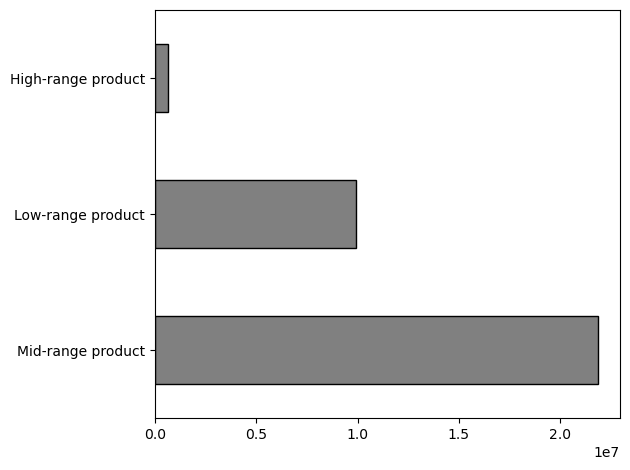

In [20]:
# create bar chart

bar = df_ords_prods_merged['price_range_loc'].value_counts().plot.barh(color = ['grey'], ec = 'black')
plt.tight_layout()

In [38]:
# export bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_range.png'))

## If-statements with for-loops

In [22]:
# checking the frequency of the orders_day_of_the_week column

df_ords_prods_merged['orders_day_of_week'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [23]:
# create for-loop

result = []

for value in df_ords_prods_merged["orders_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [24]:
result

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Reg

In [25]:
# add result to dataframe

df_ords_prods_merged['busiest_day'] = result

In [26]:
# check value counts in orders_day_of_week column

df_ords_prods_merged['busiest_day'].value_counts(dropna = False)

Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: busiest_day, dtype: int64

# 02. Task step 2

In [27]:
# drop Unnamed: 0_y column

df_ords_prods_merged = df_ords_prods_merged.drop(columns = ['Unnamed: 0_y'])

In [28]:
# create new if-statement for-loop for new requirements

result_v2 = []

for value in df_ords_prods_merged["orders_day_of_week"]:
  if value == 0 or value == 1:
    result_v2.append("Busiest days")
  elif value == 4 or value == 3:
    result_v2.append("Least busy days")
  else:
    result_v2.append("Regularly busy")

In [29]:
# add result to dataframe in new column

df_ords_prods_merged['busiest_days'] = result_v2

In [30]:
# check dataframe for new column

df_ords_prods_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Regularly busy
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days


# 03. Task step 3

In [31]:
# check value counts in busiest_days column

df_ords_prods_merged['busiest_days'].value_counts(dropna = False)

Regularly busy     12916111
Busiest days       11864412
Least busy days     7624336
Name: busiest_days, dtype: int64

## The value counts for the orders_day_of_week column are equal to the sum of the value counts for the busiest days column. In other words, when you add together the values of 0 and 1, you get the same value as the value of busiest days, adding the values of 3 and 4 gives you the value of least busy days, and adding 2, 5, and 6 gives you the value of regularly busy. The for-loop executed correctly.

# 04. Task step 4

In [32]:
# create a new column containing these labels called “busiest_period_of_day”
# check frequency of values in the "order_hour_of_day" column

df_ords_prods_merged['order_hour_of_day'].value_counts()

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

## Most orders - 10, 11, 14, 15, 13, 12, 16, 9
## Average orders - 17, 8, 18, 19, 20, 7, 21, 22
## Fewest orders - 23, 6, 0, 1, 5, 2, 4, 3

In [33]:
# create a for-loop if statement for most, average, and fewest orders

hour_of_day = []

for value in df_ords_prods_merged["order_hour_of_day"]:
  if value in [10, 11, 14, 15, 13, 12, 16, 9]:
    hour_of_day.append("Most orders")
  elif value in [23, 6, 0, 1, 5, 2, 4, 3]:
    hour_of_day.append("Fewest orders")
  else:
    hour_of_day.append("Average orders")

In [34]:
# add result to dataframe as "busiest_period_of_day" column

df_ords_prods_merged['busiest_period_of_day'] = hour_of_day

In [35]:
# check columns to make sure for-loop executed correctly

df_ords_prods_merged[['order_hour_of_day', 'busiest_period_of_day']].head(10)

,order_hour_of_day,busiest_period_of_day
0,8,Average orders
1,7,Average orders
2,12,Most orders
3,7,Average orders
4,15,Most orders
5,7,Average orders
6,9,Most orders
7,14,Most orders
8,16,Most orders
9,8,Average orders


# 05. Task step 5

In [36]:
# print the frequency for busiest_period_of_day column

df_ords_prods_merged['busiest_period_of_day'].value_counts()

Most orders       21118071
Average orders     9997651
Fewest orders      1289137
Name: busiest_period_of_day, dtype: int64

## The frequencies for most orders, average orders, and fewest orders is equal to the sums of the frequencies of order_hour_of_day. The for-loop executed correctly.

# 06. Task step 7

In [37]:
# export as pickle file

df_ords_prods_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged_updated.pkl'))